In [1]:
import os
os.chdir("..")

In [2]:
from core.nn.LSTMmodel import LSTM
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set()
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [60]:
COUNTRY      = 'Netherlands'
DEVICE       = 'cpu'
TRAIN_UP_TO  = pd.to_datetime('2020-10-01')
ThreshConf   = 70
ThreshDead   = 20
target       = "New Confirmed"
confRange    = [10, 500, 700]

In [61]:
lstm = LSTM(COUNTRY, TRAIN_UP_TO, ThreshConf, ThreshDead, target)

Init LSTM model for Netherlands, trained up to 2020-10-01 00:00:00,                 with a Confirmed Cases threshold of 70                  and window size of 10


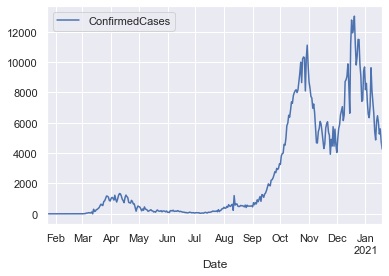

In [62]:
df = lstm.init_data()
df[df["Province_State"] == COUNTRY].plot(x="Date", y="ConfirmedCases");

70 threshold


100%|██████████| 10/10 [00:18<00:00,  1.83s/it, Loss =0.0012, Lr=0.05]


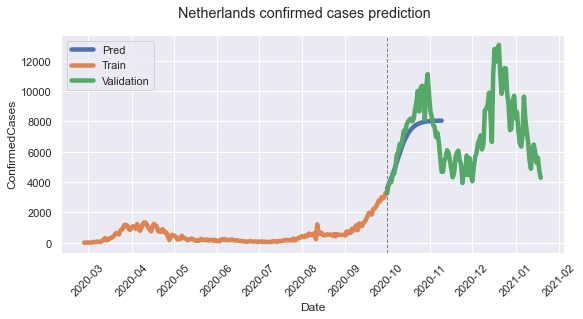

MAPE : 0.34993  (not normalized)


0.3499320149421692

In [63]:
lstm.simulate()

In [ ]:
confRange = [60, 70, 80]
lstm.optimizeTreshold(confRange)